In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [2]:
# Load the dataset
df = pd.read_csv('BT_Dataset.csv')
df

,Question,Label
0,Can you list the ingredients needed for a clas...,Remember
1,What are the top five tourist attractions in P...,Remember
2,List five common programming languages.,Remember
3,Name three types of renewable energy sources.,Remember
4,Can you list the planets in our solar system?,Remember
...,...,...
1766,Can you generalize from historical economic cy...,Create
1767,How can you relate knowledge from history and ...,Create
1768,What conclusions can you draw by combining int...,Create
1769,How could old architectural styles be combined...,Create


In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization (split the text into words)
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Apply stemming (reduce words to their root form)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Join the words back into a string
    processed_text = ' '.join(words)
    
    return processed_text

In [5]:
# Apply text preprocessing to the 'Question' column
df['Processed_Question'] = df['Question'].apply(preprocess_text)

In [6]:
# Retrain-test split with processed text
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Question'], df['Label'], test_size=0.2, random_state=42)


In [7]:
# Vectorization using CountVectorizer with processed text
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [8]:
# Vectorization using TF-IDF Vectorizer with processed text
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
# Display the processed data
print("Processed Data:")
print(df[['Processed_Question', 'Label']])

Processed Data:
                                     Processed_Question     Label
0             list ingredi need classic spaghetti recip  Remember
1                         top five tourist attract pari  Remember
2                      list five common program languag  Remember
3                    name three type renew energi sourc  Remember
4                              list planet solar system  Remember
...                                                 ...       ...
1766  gener histor econom cycl predict futur financi...    Create
1767  relat knowledg histori psycholog understand cu...    Create
1768  conclus draw combin interpret differ religi pe...    Create
1769  could old architectur style combin creat susta...    Create
1770  gener histor fashion trend predict futur style...    Create

[1771 rows x 2 columns]


In [10]:
# Label encoding for the 'Label' column
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Question'], df['Label'], test_size=0.2, random_state=42)


In [11]:
# Vectorization using CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [12]:
# Vectorization using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
# Machine Learning Models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3)
}

In [14]:

for name, model in models.items():
    # Fit the model using CountVectorizer
    model.fit(X_train_count, y_train)
    y_pred_count = model.predict(X_test_count)
    
    # Evaluate the model
    accuracy_count = accuracy_score(y_test, y_pred_count)
    print(f'{name} - CountVectorizer Accuracy: {accuracy_count}')
    print(classification_report(y_test, y_pred_count))
    
    # Fit the model using TF-IDF Vectorizer
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    
    # Evaluate the model
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f'{name} - TF-IDF Vectorizer Accuracy: {accuracy_tfidf}')
    print(classification_report(y_test, y_pred_tfidf))

Multinomial Naive Bayes - CountVectorizer Accuracy: 0.856338028169014
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        61
           1       0.76      0.91      0.83        58
           2       0.98      0.90      0.94        63
           3       0.98      0.83      0.90        60
           4       0.86      0.73      0.79        52
           5       0.77      0.84      0.80        61

    accuracy                           0.86       355
   macro avg       0.86      0.85      0.86       355
weighted avg       0.87      0.86      0.86       355

Multinomial Naive Bayes - TF-IDF Vectorizer Accuracy: 0.8535211267605634
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        61
           1       0.77      0.91      0.83        58
           2       0.97      0.92      0.94        63
           3       0.98      0.85      0.91        60
           4       0.89      0.65      0.76

In [15]:
# Deep Learning Model using Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

X_train_pad = pad_sequences(X_train_seq, maxlen=20, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=20, padding='post')

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pad, y_train, epochs=10, batch_size=1, verbose=1)

_, accuracy_dl = model.evaluate(X_test_pad, y_test)
print(f'Deep Learning (Keras) Accuracy: {accuracy_dl}')


Epoch 1/10
1416/1416 [==============================] - 1s 325us/step - loss: -1618914.7500 - accuracy: 0.1709
Epoch 2/10
1416/1416 [==============================] - 0s 317us/step - loss: -20987108.0000 - accuracy: 0.1709
Epoch 3/10
1416/1416 [==============================] - 0s 318us/step - loss: -76708472.0000 - accuracy: 0.1709
Epoch 4/10
1416/1416 [==============================] - 0s 318us/step - loss: -177607824.0000 - accuracy: 0.1709
Epoch 5/10
1416/1416 [==============================] - 0s 318us/step - loss: -326353056.0000 - accuracy: 0.1709
Epoch 6/10
1416/1416 [==============================] - 0s 318us/step - loss: -533844512.0000 - accuracy: 0.1709
Epoch 7/10
1416/1416 [==============================] - 0s 318us/step - loss: -807324160.0000 - accuracy: 0.1709
Epoch 8/10
1416/1416 [==============================] - 0s 317us/step - loss: -1150752512.0000 - accuracy: 0.1709
Epoch 9/10
1416/1416 [==============================] - 0s 317us/step - loss: -1568686592.0000 - ac

In [ ]:
# # RandomForestClassifier & Naive Bays & KNeighborsClassifier & Support Vector Machine

In [16]:
import gensim.downloader as api

word_vect = api.load('word2vec-google-news-300')

In [17]:
!pip install spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [18]:
# tokenises a sentence using spacy library
def spacy_tokenizer(text):
    doc = nlp(text)

    # lemmatise tokens
    tokens = [word.lemma_.strip() for word in doc]

    return tokens

In [19]:
import numpy as np

# takes a tokenized sentence input from spacy and takes average of all word vectors
def sentence_vect(tokens):
    # word2vec output size (300 for word2vec-google-news-300)
    size = word_vect.vector_size

    # create a vector of zeroes
    sent_vect = np.zeros(size)

    # get average of all word vectors of each token
    counter = 0
    for word in tokens:
        if word in word_vect:
            sent_vect += word_vect[word]
            counter += 1

    if counter == 0:
        return None

    sent_vect = sent_vect / counter
    return sent_vect

In [20]:
import pandas as pd
df = pd.read_csv('B.csv')
df

,Question,Label
0,Can you list the ingredients needed for a clas...,Remember
1,What are the top five tourist attractions in P...,Remember
2,List five common programming languages.,Remember
3,Name three types of renewable energy sources.,Remember
4,Can you list the planets in our solar system?,Remember
...,...,...
1766,Can you generalize from historical economic cy...,Create
1767,How can you relate knowledge from history and ...,Create
1768,What conclusions can you draw by combining int...,Create
1769,How could old architectural styles be combined...,Create


In [21]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('B.csv')

# removes all punctuations and change to lower case
df['Question'] = df['Question'].str.replace(r'[^\w\s]+', '', regex=True)
df['Question'] = df['Question'].str.lower()

df['Label'] = pd.factorize(df.Label)[0]
# df['Label'].value_counts()

# Change categories into numbers
# Analysis - 0
# Application - 1
# Synthesis - 2
# Evaluation - 3
# Knowledge - 4
# Comprehension - 5

# Blooms taxonomy categories
categories = [' Remember',  ' Understand', ' Apply',  ' Analyse',  ' Evaluate', ' Create']

In [22]:
# add a row of tokenised text
df['Tokens'] = df['Question'].apply(spacy_tokenizer)

In [23]:
# create sentence vectors by taking average of token vectors
df['Vectors'] = df['Tokens'].apply(sentence_vect)

# drop all null values after tokenizing as some cells may not have relevant data
df = df.dropna(axis=0, subset=['Vectors'])

In [24]:
from sklearn.model_selection import train_test_split

# X - sentence vectors (Vectors)
# Y - blooms category (Label)

# split data into training and test set (0.8, 0.2)
train, test = train_test_split(df, test_size=0.30)

In [25]:
test.Vectors

1629    [0.0968488057454427, -0.011494954427083334, 0....
389     [0.22737630208333334, 0.0023447672526041665, 0...
1337    [0.1460418701171875, -0.0140380859375, -0.0853...
99      [-0.00321197509765625, -0.03619384765625, 0.03...
1417    [0.1022677951388889, 0.026207817925347224, 0.0...
                              ...                        
1365    [0.00697021484375, 0.0746002197265625, 0.08489...
1109    [0.0011850992838541667, -0.0337982177734375, 0...
868     [0.07610614483173077, 0.013596754807692308, 0....
1390    [0.05133056640625, -0.0820465087890625, -0.028...
1674    [0.073651123046875, -0.0051596641540527345, -0...
Name: Vectors, Length: 532, dtype: object

In [26]:
train

,Question,Label,Tokens,Vectors
599,apply the principles of engineering to solve t...,2,"[apply, the, principle, of, engineering, to, s...","[0.004058837890625, 0.027313232421875, -0.0001..."
1401,assess the value of democratic theories in pol...,4,"[assess, the, value, of, democratic, theory, i...","[0.0099945068359375, 0.053741455078125, 0.0710..."
248,name the theory that explains the behavior of ...,0,"[name, the, theory, that, explain, the, behavi...","[0.008448282877604166, 0.056498209635416664, -..."
710,how can you experiment to study the effects of...,2,"[how, can, you, experiment, to, study, the, ef...","[0.08031209309895833, 0.037882486979166664, 0...."
1587,how can you generate innovative ideas for a te...,5,"[how, can, you, generate, innovative, idea, fo...","[0.052337646484375, 0.010284423828125, 0.07767..."
...,...,...,...,...
664,apply principles of law to solve a legal case,2,"[apply, principle, of, law, to, solve, a, lega...","[-0.042724609375, 0.024576822916666668, 0.0076..."
1591,can you integrate artificial intelligence into...,5,"[can, you, integrate, artificial, intelligence...","[-0.00618438720703125, -0.016796875, 0.0031372..."
856,how would you use statistical methods to analy...,2,"[how, would, you, use, statistical, method, to...","[0.06317693536931818, -0.008955522017045454, 0..."
204,tabulate the results of a recent survey on env...,0,"[tabulate, the, result, of, a, recent, survey,...","[0.0363006591796875, 0.01373291015625, -0.0885..."


In [27]:
test

,Question,Label,Tokens,Vectors
1629,how do you create an engaging user interface f...,5,"[how, do, you, create, an, engage, user, inter...","[0.0968488057454427, -0.011494954427083334, 0...."
389,interpret the moral lesson in a fable,1,"[interpret, the, moral, lesson, in, a, fable]","[0.22737630208333334, 0.0023447672526041665, 0..."
1337,measure the impact of influencer marketing on ...,4,"[measure, the, impact, of, influencer, marketi...","[0.1460418701171875, -0.0140380859375, -0.0853..."
99,tabulate the performance metrics for employees...,0,"[tabulate, the, performance, metric, for, empl...","[-0.00321197509765625, -0.03619384765625, 0.03..."
1417,recognize subjectivity in a debate about the b...,4,"[recognize, subjectivity, in, a, debate, about...","[0.1022677951388889, 0.026207817925347224, 0.0..."
...,...,...,...,...
1365,argue for or against the use of ai in criminal...,4,"[argue, for, or, against, the, use, of, ai, in...","[0.00697021484375, 0.0746002197265625, 0.08489..."
1109,what steps do you take to identify missing inf...,3,"[what, step, do, you, take, to, identify, miss...","[0.0011850992838541667, -0.0337982177734375, 0..."
868,how would you use linguistic concepts to analy...,2,"[how, would, you, use, linguistic, concept, to...","[0.07610614483173077, 0.013596754807692308, 0...."
1390,verify the value of anecdotal evidence in a pe...,4,"[verify, the, value, of, anecdotal, evidence, ...","[0.05133056640625, -0.0820465087890625, -0.028..."


              precision    recall  f1-score   support

           0       0.88      0.79      0.83        94
           1       0.72      0.81      0.76        85
           2       0.83      0.86      0.85        86
           3       0.87      0.79      0.82        98
           4       0.88      0.85      0.87        87
           5       0.91      1.00      0.95        82

    accuracy                           0.85       532
   macro avg       0.85      0.85      0.85       532
weighted avg       0.85      0.85      0.85       532

Accuracy: 0.8458646616541353


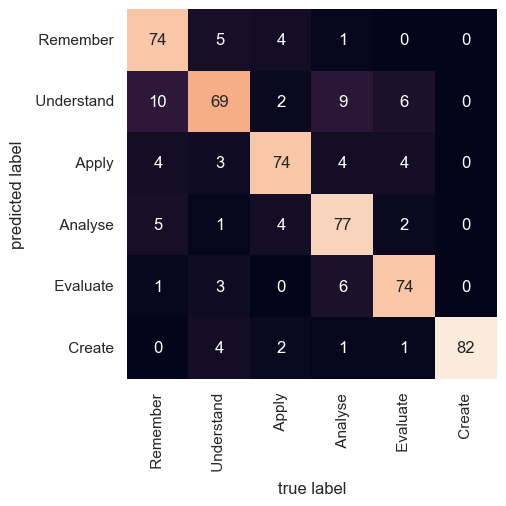

In [28]:
from sklearn.svm import SVC

# model based on Support Vector Machine (non-probabilistic classifier)
model = SVC(kernel='linear', gamma='auto', degree=3)

# Fit sentence vectors to labels
model.fit(list(train.Vectors), train.Label)

# Generate blooms label on test set
labels = model.predict(list(test.Vectors))


# model report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Heatmap of model
mat = confusion_matrix(test.Label, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            , xticklabels=categories
            , yticklabels=categories)

plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(test.Label, labels))
# Model Accuracy, how often is the classifier correct?

acc = accuracy_score(test.Label, labels)
print("Accuracy:", acc)

In [29]:
category_dict = {0: ' Remember', 1: ' Understand', 2: ' Apply', 3: ' Analyse', 4: ' Evaluate', 5: ' Create'}

def predict_blooms(text, model):
    process = spacy_tokenizer(text)
    process = sentence_vect(process)
    blooms = model.predict([process])
    print("Predicted Class:", category_dict[blooms[0]])

In [30]:
print(categories, "\n")

task = "What changes would you make to solve …?"

print("\nSVM PREDICTION:")
predict_blooms(task, model)

[' Remember', ' Understand', ' Apply', ' Analyse', ' Evaluate', ' Create'] 


SVM PREDICTION:
Predicted Class:  Create


In [31]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
model2= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  
model2.fit(list(train.Vectors), train.Label) 
labels2 = model2.predict(list(test.Vectors))

              precision    recall  f1-score   support

           0       0.93      0.53      0.68        94
           1       0.75      0.66      0.70        85
           2       0.69      0.79      0.74        86
           3       0.64      0.89      0.75        98
           4       0.92      0.75      0.82        87
           5       0.81      0.96      0.88        82

    accuracy                           0.76       532
   macro avg       0.79      0.76      0.76       532
weighted avg       0.79      0.76      0.76       532

Accuracy: 0.7612781954887218


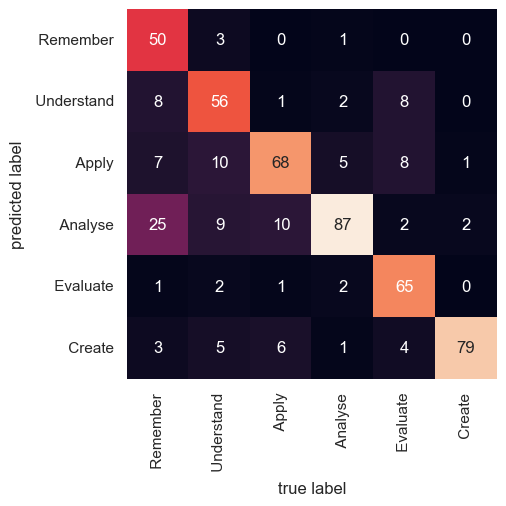

In [32]:
# Heatmap of model
mat = confusion_matrix(test.Label, labels2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            , xticklabels=categories
            , yticklabels=categories)

plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(test.Label, labels2))
# Model Accuracy, how often is the classifier correct?

acc = accuracy_score(test.Label, labels2)
print("Accuracy:", acc)

In [33]:
category_dict = {0: ' Remember', 1: ' Understand', 2: ' Apply', 3: ' Analyse', 4: ' Evaluate', 5: ' Create'}

def predict_blooms(text, model):
    process = spacy_tokenizer(text)
    process = sentence_vect(process)
    blooms = model2.predict([process])
    print("Predicted Class:", category_dict[blooms[0]])

In [34]:
print(categories, "\n")

task = "What changes would you make to solve …?"

print("\nKNeighborsClassifier PREDICTION:")
predict_blooms(task, model)

[' Remember', ' Understand', ' Apply', ' Analyse', ' Evaluate', ' Create'] 


KNeighborsClassifier PREDICTION:
Predicted Class:  Evaluate


In [35]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(list(train.Vectors), train.Label) 
labels3 = classifier.predict(list(test.Vectors))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61        94
           1       0.45      0.47      0.46        85
           2       0.66      0.66      0.66        86
           3       0.74      0.77      0.75        98
           4       0.61      0.53      0.56        87
           5       0.86      0.79      0.82        82

    accuracy                           0.64       532
   macro avg       0.65      0.64      0.64       532
weighted avg       0.65      0.64      0.65       532

Accuracy: 0.6447368421052632


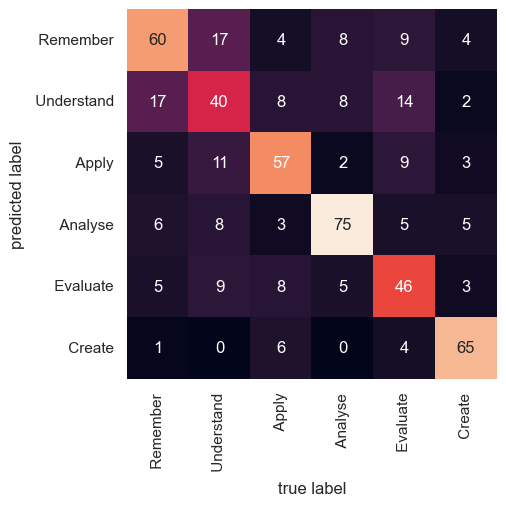

In [36]:
# Heatmap of model
mat = confusion_matrix(test.Label, labels3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            , xticklabels=categories
            , yticklabels=categories)

plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(test.Label, labels3))
# Model Accuracy, how often is the classifier correct?

acc = accuracy_score(test.Label, labels3)
print("Accuracy:", acc)

In [37]:
category_dict = {0: ' Remember', 1: ' Understand', 2: ' Apply', 3: ' Analyse', 4: ' Evaluate', 5: ' Create'}

def predict_blooms(text, model):
    process = spacy_tokenizer(text)
    process = sentence_vect(process)
    blooms = model2.predict([process])
    print("Predicted Class:", category_dict[blooms[0]])

In [38]:
print(categories, "\n")

task = "What changes would you make to solve …?"

print("\nRandomForestClassifier   PREDICTION:")
predict_blooms(task, model)

[' Remember', ' Understand', ' Apply', ' Analyse', ' Evaluate', ' Create'] 


RandomForestClassifier   PREDICTION:
Predicted Class:  Evaluate


In [39]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model4 = GaussianNB()

# Model training
model4.fit(list(train.Vectors), train.Label)

labels4 = model4.predict(list(test.Vectors))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        94
           1       0.52      0.55      0.53        85
           2       0.66      0.69      0.67        86
           3       0.71      0.66      0.68        98
           4       0.60      0.66      0.63        87
           5       0.74      0.93      0.82        82

    accuracy                           0.67       532
   macro avg       0.68      0.67      0.67       532
weighted avg       0.68      0.67      0.67       532

Accuracy: 0.6691729323308271


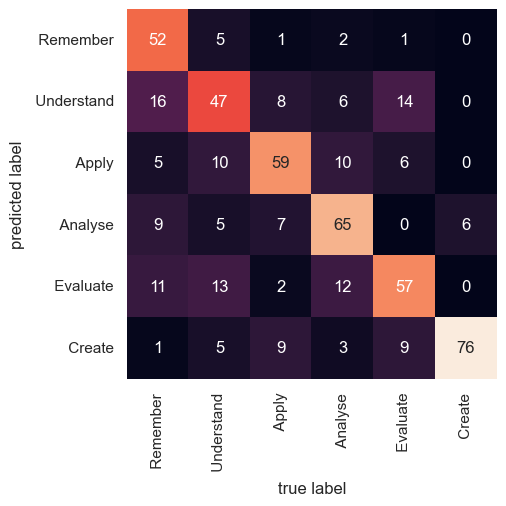

In [40]:
# Heatmap of model
mat = confusion_matrix(test.Label, labels4)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            , xticklabels=categories
            , yticklabels=categories)

plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(test.Label, labels4))
# Model Accuracy, how often is the classifier correct?

acc = accuracy_score(test.Label, labels4)
print("Accuracy:", acc)

In [41]:
category_dict = {0: ' Remember', 1: ' Understand', 2: ' Apply', 3: ' Analyse', 4: ' Evaluate', 5: ' Create'}

def predict_blooms(text, model4):
    process = spacy_tokenizer(text)
    process = sentence_vect(process)
    blooms = model4.predict([process])
    print("Predicted Class:", category_dict[blooms[0]])

In [42]:
print(categories, "\n")

task = "What changes would you make to solve …?"

print("\nRandomForestClassifier   PREDICTION:")
predict_blooms(task, model4)

[' Remember', ' Understand', ' Apply', ' Analyse', ' Evaluate', ' Create'] 


RandomForestClassifier   PREDICTION:
Predicted Class:  Remember
